# Ford GoBike System Data Exploration
## by Oluwatosin Falebita



<a href='#the_destination'> Introduction </a>
> This document explores a Ford GoBike System dataset containing Bay Wheels's trip data for May 2020.

Research Questions
> * What day of the week has the highest number of riders.
> * What categories of rider has fair judgement.
> * The higest duration of a rider.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
%matplotlib inline

In [2]:
#importing dataset for april
bike = pd.read_csv('202005-baywheels-tripdata.csv')

In [3]:
bike.sample(5)

ride_id  rideable_type           started_at  \
118809  A8D3846B0240FDF4  electric_bike  2020-05-18 15:36:09   
26466   F6AAE9F3D0B7CED5  electric_bike  2020-05-12 10:00:45   
23582   396CEF1B5DC32FB3    docked_bike  2020-05-05 19:06:26   
24023   06BA4820339972A1    docked_bike  2020-05-24 17:01:00   
19016   6F05D8F2FB5DAB25    docked_bike  2020-05-07 14:38:12   

                   ended_at                            start_station_name  \
118809  2020-05-18 15:52:33                         10th Ave at Irving St   
26466   2020-05-12 10:09:27  Powell St BART Station (Market St at 5th St)   
23582   2020-05-05 19:12:18                   O'Farrell St at Masonic Ave   
24023   2020-05-24 17:59:53                         Sanchez St at 15th St   
19016   2020-05-07 14:45:21                           Jones St at Post St   

        start_station_id                                 end_station_name  \
118809             451.0                                              NaN   
26466                5.0                                              NaN   
23582              481.0                       Raymond Kimbell Playground   
24023               95.0                            Sanchez St at 15th St   
19016              370.0  Mechanics Monument Plaza (Market St at Bush St)   

        end_station_id  start_lat  start_lng  end_lat   end_lng member_casual  \
118809             NaN    37.7642  -122.4674  37.7736 -122.4402        casual   
26466              NaN    37.7838  -122.4082  37.7653 -122.3908        member   
23582             31.0    37.7811  -122.4474  37.7838 -122.4346        member   
24023             95.0    37.7662  -122.4311  37.7662 -122.4311        member   
19016             20.0    37.7873  -122.4133  37.7913 -122.3991        casual   

        is_equity  
118809      False  
26466       False  
23582       False  
24023       False  
19016       False

## Data wrangling

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             138251 non-null  object 
 1   rideable_type       138251 non-null  object 
 2   started_at          138251 non-null  object 
 3   ended_at            138251 non-null  object 
 4   start_station_name  87315 non-null   object 
 5   start_station_id    87315 non-null   float64
 6   end_station_name    84779 non-null   object 
 7   end_station_id      84779 non-null   float64
 8   start_lat           138251 non-null  float64
 9   start_lng           138251 non-null  float64
 10  end_lat             138027 non-null  float64
 11  end_lng             138027 non-null  float64
 12  member_casual       138251 non-null  object 
 13  is_equity           138251 non-null  bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 10.2+ MB


In [5]:
# Checking for null values
bike.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    50936
start_station_id      50936
end_station_name      53472
end_station_id        53472
start_lat                 0
start_lng                 0
end_lat                 224
end_lng                 224
member_casual             0
is_equity                 0
dtype: int64

In [6]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)

(138251, 14)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
is_equity                bool
dtype: object


* ### Quality issues
> 1. Invalid datatype : started_at, ended_at. 
> 2. Missing values : missing values in start_station_name, start_startion_id, end_station_name, end_station_id, end_lat, end_lng. 
> 3. Rename undescriptive columns

* #### Fixing quality issues

#### Define
> * 1. Invalid dtypes: started_at and ended_at should be timestamp instead of object

#### Code

In [7]:
# Checking the dtype for started_at
bike.started_at, bike.ended_at

(0         2020-05-18 22:16:06
 1         2020-05-19 16:57:35
 2         2020-05-18 20:08:14
 3         2020-05-19 14:05:08
 4         2020-05-10 17:45:54
                  ...         
 138246    2020-05-10 17:26:19
 138247    2020-05-30 17:40:19
 138248    2020-05-31 12:34:41
 138249    2020-05-30 17:27:57
 138250    2020-05-31 13:49:41
 Name: started_at, Length: 138251, dtype: object,
 0         2020-05-18 22:28:20
 1         2020-05-19 17:29:56
 2         2020-05-18 20:14:25
 3         2020-05-19 14:14:16
 4         2020-05-10 18:29:29
                  ...         
 138246    2020-05-10 17:46:18
 138247    2020-05-30 17:47:50
 138248    2020-05-31 14:42:32
 138249    2020-05-30 17:46:56
 138250    2020-05-31 14:10:56
 Name: ended_at, Length: 138251, dtype: object)

In [8]:
bike['started_at'] = pd.to_datetime(bike['started_at'], format='%Y/%m/%d %H:%M:%S.%f')
bike['ended_at'] = pd.to_datetime(bike['ended_at'], format='%Y/%m/%d %H:%M:%S.%f')

#### Test

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             138251 non-null  object        
 1   rideable_type       138251 non-null  object        
 2   started_at          138251 non-null  datetime64[ns]
 3   ended_at            138251 non-null  datetime64[ns]
 4   start_station_name  87315 non-null   object        
 5   start_station_id    87315 non-null   float64       
 6   end_station_name    84779 non-null   object        
 7   end_station_id      84779 non-null   float64       
 8   start_lat           138251 non-null  float64       
 9   start_lng           138251 non-null  float64       
 10  end_lat             138027 non-null  float64       
 11  end_lng             138027 non-null  float64       
 12  member_casual       138251 non-null  object        
 13  is_equity           138251 no

In [10]:
bike.sample(5)

ride_id  rideable_type          started_at  \
118076  02B7FF93112ACFBA  electric_bike 2020-05-01 18:18:36   
77290   1AE3F62E21E9043F  electric_bike 2020-05-09 13:20:18   
113675  FD3D9F04F67DD90B  electric_bike 2020-05-24 08:36:34   
23392   5990ABDF8593DCDB    docked_bike 2020-05-29 18:39:13   
45764   E79F38369DBDFD36  electric_bike 2020-05-16 12:19:21   

                  ended_at            start_station_name  start_station_id  \
118076 2020-05-01 18:24:43        Jersey St at Castro St             137.0   
77290  2020-05-09 13:29:41        Jersey St at Castro St             137.0   
113675 2020-05-24 08:55:50                           NaN               NaN   
23392  2020-05-29 18:49:28  4th St at Mission Bay Blvd S              93.0   
45764  2020-05-16 12:20:12           1st St at Folsom St              26.0   

           end_station_name  end_station_id  start_lat  start_lng  end_lat  \
118076                  NaN             NaN    37.7505  -122.4339  37.7485   
77290    Mission Playground           121.0    37.7505  -122.4337  37.7591   
113675                  NaN             NaN    37.3309  -121.8782  37.3653   
23392   Howard St at 8th St            61.0    37.7704  -122.3912  37.7765   
45764   1st St at Folsom St            26.0    37.7869  -122.3945  37.7870   

         end_lng member_casual  is_equity  
118076 -122.4271        casual      False  
77290  -122.4214        member      False  
113675 -121.8925        casual      False  
23392  -122.4113        member      False  
45764  -122.3944        member      False

#### Define
> * 2. Check and removing Missing data

#### Code

In [11]:
bike.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    50936
start_station_id      50936
end_station_name      53472
end_station_id        53472
start_lat                 0
start_lng                 0
end_lat                 224
end_lng                 224
member_casual             0
is_equity                 0
dtype: int64

In [12]:
# Dropping missing values
bike.dropna(inplace=True)

* Checking for duplicates

#### Test

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70895 entries, 8 to 138246
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             70895 non-null  object        
 1   rideable_type       70895 non-null  object        
 2   started_at          70895 non-null  datetime64[ns]
 3   ended_at            70895 non-null  datetime64[ns]
 4   start_station_name  70895 non-null  object        
 5   start_station_id    70895 non-null  float64       
 6   end_station_name    70895 non-null  object        
 7   end_station_id      70895 non-null  float64       
 8   start_lat           70895 non-null  float64       
 9   start_lng           70895 non-null  float64       
 10  end_lat             70895 non-null  float64       
 11  end_lng             70895 non-null  float64       
 12  member_casual       70895 non-null  object        
 13  is_equity           70895 non-null  bool     

#### Define
> * 3. Rename undescriptive columns

#### Code

In [14]:
bike.rename(columns = {'member_casual' : 'user_type'}, inplace = True)

#### Test

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70895 entries, 8 to 138246
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             70895 non-null  object        
 1   rideable_type       70895 non-null  object        
 2   started_at          70895 non-null  datetime64[ns]
 3   ended_at            70895 non-null  datetime64[ns]
 4   start_station_name  70895 non-null  object        
 5   start_station_id    70895 non-null  float64       
 6   end_station_name    70895 non-null  object        
 7   end_station_id      70895 non-null  float64       
 8   start_lat           70895 non-null  float64       
 9   start_lng           70895 non-null  float64       
 10  end_lat             70895 non-null  float64       
 11  end_lng             70895 non-null  float64       
 12  user_type           70895 non-null  object        
 13  is_equity           70895 non-null  bool     

### Tidiness issues 

> * 1. Calculate the distance covered by each rider.
> * 2. Calculate the trip duration
> * 3. Get Start Day and End day for the trips
> * 4. Remove rows where covered distance is equal to zero.
> * 5. Remove rows where duration is equal to zero
> * 6. Drop started_at, ended_at, start_lat, start_lng, end_lat, and end_lng

#### Define
>* 1. Calculate the distance covered by each rider.
> To calculate the distance covered by each rider, install and import geopy and use the start_lat, start_lng, end_lat and end_lng to get distance in kilometers.
> * Reference: https://stackoverflow.com/questions/50402199/error-while-getting-the-distance-between-two-co-ordinates

#### Code

In [16]:
# A function to calculate distance using geopy.
def distancer(row):
    coords_1 = (row['start_lat'], row['start_lng'])
    coords_2 = (row['end_lat'], row['end_lng'])
    return geopy.distance.geodesic(coords_1, coords_2).m
# Add result to a new column
bike['covered_distance'] = bike.apply(distancer, axis=1)

In [17]:
bike['covered_distance']

8         1618.616986
10        1842.899192
18        5188.384797
27        2943.400582
28         690.909747
             ...     
138233    2604.951163
138236    1815.440435
138240    1330.018798
138243    1274.144440
138246    4009.978101
Name: covered_distance, Length: 70895, dtype: float64

#### Test

In [18]:
bike.sample(5)

ride_id  rideable_type          started_at  \
98660  D5AE3DA2DE479286  electric_bike 2020-05-16 14:27:33   
32701  A418A7A07BE482CC    docked_bike 2020-05-03 13:10:35   
84373  8F0F1B03EB47DA39  electric_bike 2020-05-07 21:21:10   
32938  4F9C5D2A037DE8C4    docked_bike 2020-05-15 01:44:21   
51722  8439B061104C0E87  electric_bike 2020-05-23 11:34:15   

                 ended_at             start_station_name  start_station_id  \
98660 2020-05-16 15:15:40             Hyde St at Post St             369.0   
32701 2020-05-03 13:42:04          Laguna St at Hayes St              74.0   
84373 2020-05-07 21:28:35            Howard St at 6th St             349.0   
32938 2020-05-15 02:03:11            2nd St at Julian St             357.0   
51722 2020-05-23 12:00:30  The Embarcadero at Sansome St               6.0   

                               end_station_name  end_station_id  start_lat  \
98660                        Hyde St at Post St           369.0    37.7875   
32701  Garfield Square (25th St at Harrison St)           139.0    37.7764   
84373                       Howard St at 6th St           349.0    37.7803   
32938                       2nd St at Julian St           357.0    37.3411   
51722                      Folsom St at 13th St            87.0    37.8048   

       start_lng  end_lat   end_lng user_type  is_equity  covered_distance  
98660  -122.4167  37.7877 -122.4165    casual      False         28.339602  
32701  -122.4262  37.7510 -122.4119    casual      False       3087.965610  
84373  -122.4065  37.7802 -122.4067    member       True         20.823410  
32938  -121.8928  37.3411 -121.8928    casual      False          0.000000  
51722  -122.4033  37.7702 -122.4154    member      False       3985.499017

#### Define
>* 2. Calculate the duration of each rider in minutes


#### Code

In [19]:
# Duration in minutes
bike['duration'] = bike['ended_at'] - bike['started_at']
bike['duration']= bike['duration']/np.timedelta64(1,'m')

In [20]:
bike.describe()

start_station_id  end_station_id     start_lat     start_lng  \
count      70895.000000    70895.000000  70895.000000  70895.000000   
mean         221.950716      223.209267     37.766993   -122.372873   
std          167.852998      168.023519      0.093669      0.116820   
min            3.000000        3.000000     37.309000   -122.509100   
25%           73.000000       74.000000     37.767000   -122.426800   
50%          175.000000      176.000000     37.777500   -122.408500   
75%          377.000000      377.000000     37.795300   -122.390400   
max          521.000000      521.000000     37.880200   -121.863700   

            end_lat       end_lng  covered_distance      duration  
count  70895.000000  70895.000000      70895.000000  70895.000000  
mean      37.766871   -122.373271       1809.678539     33.547717  
std        0.093580      0.116857       1574.290157    378.344806  
min       37.309000   -122.509100          0.000000     -0.783333  
25%       37.767000   -122.426700        601.835998      7.816667  
50%       37.777400   -122.408500       1500.046951     14.733333  
75%       37.795400   -122.390600       2713.801389     27.933333  
max       37.880200   -121.863700      17505.542197  34350.250000

#### Define 
> * 3. Get Start Day and End day for the trips

#### Code

In [21]:
bike['start_day'] = bike['started_at'].dt.day_name()
bike['end_day'] = bike['ended_at'].dt.day_name()

In [22]:
bike.sample(20)

ride_id  rideable_type          started_at  \
9127    E250E5563547E26C  electric_bike 2020-05-04 14:11:18   
93064   DC71DB40720676A9    docked_bike 2020-05-21 17:15:18   
91070   83EFCB6F71E1E949    docked_bike 2020-05-10 10:57:25   
73460   42174ADA6F6D9973    docked_bike 2020-05-15 17:56:59   
37572   2899AC2151ADB285    docked_bike 2020-05-09 21:10:11   
50088   860466A8A765DD9D    docked_bike 2020-05-16 05:44:57   
131931  462FEDD227D91E1E  electric_bike 2020-05-30 19:15:06   
54901   8C7234DC6C3AA9EF    docked_bike 2020-05-21 14:52:50   
19249   64F85A2C2A6861A6    docked_bike 2020-05-09 17:03:27   
58723   B9F93DF44BD9A1C3    docked_bike 2020-05-16 16:00:11   
18562   CC46F17ABB109F35    docked_bike 2020-05-10 20:04:55   
60179   3CF95F8E3F9C8EAE  electric_bike 2020-05-15 12:26:15   
69167   2F6E3C544A4ADD1D  electric_bike 2020-05-07 16:26:46   
15213   12DDCDBCC15DDBBF  electric_bike 2020-05-26 18:25:00   
20605   DDB011CA1C266CEA  electric_bike 2020-05-15 12:03:14   
33017   E9C29D84BC3F2AB8    docked_bike 2020-05-26 10:59:07   
69487   9E730D3C8AFF4644    docked_bike 2020-05-29 19:37:35   
106433  B2DECBCBE8C6589F  electric_bike 2020-05-24 12:39:47   
109729  BA7ADC7D525E23CA  electric_bike 2020-05-08 14:51:44   
3325    F84676119983B961  electric_bike 2020-05-11 15:18:57   

                  ended_at                                 start_station_name  \
9127   2020-05-04 14:53:15                        Scott St at Golden Gate Ave   
93064  2020-05-21 17:19:35                              Hubbell St at 16th St   
91070  2020-05-10 11:00:02                             Parker St at Fulton St   
73460  2020-05-15 18:39:53                                Broadway at 40th St   
37572  2020-05-09 21:17:33                             Pierce St at Haight St   
50088  2020-05-16 06:32:03                    California St at University Ave   
131931 2020-05-30 19:21:17                             Broderick St at Oak St   
54901  2020-05-21 15:31:13                           Telegraph Ave at 19th St   
19249  2020-05-09 17:28:30                              10th Ave at Irving St   
58723  2020-05-16 16:07:59                          Lake Merritt BART Station   
18562  2020-05-10 20:12:32                                 Utah St at 24th St   
60179  2020-05-15 12:35:30                               Bryant St at 15th St   
69167  2020-05-07 16:58:47                      Frederick St at Arguello Blvd   
15213  2020-05-26 18:37:07                             24th St at Bartlett St   
20605  2020-05-15 12:14:07                            23rd St at Tennessee St   
33017  2020-05-26 11:58:04                        Bancroft Way at College Ave   
69487  2020-05-29 19:59:26  San Francisco Ferry Building (Harry Bridges Pl...   
106433 2020-05-24 12:40:53                        Chestnut St at Van Ness Ave   
109729 2020-05-08 15:02:36                             Pierce St at Haight St   
3325   2020-05-11 15:55:43                               Palm St at Willow St   

        start_station_id                                   end_station_name  \
9127                39.0                            48th Ave at Cabrillo St   
93064              345.0                         Rhode Island St at 17th St   
91070              266.0                            Oregon St at Adeline St   
73460              211.0                                Broadway at 40th St   
37572               73.0  San Francisco Public Library (Grove St at Hyde...   
50088              251.0                    California St at University Ave   
131931              71.0                        O'Farrell St at Masonic Ave   
54901              183.0                           Telegraph Ave at 19th St   
19249              451.0                              Fell St at Stanyan St   
58723              163.0                           Telegraph Ave at 19th St   
18562              459.0                                 Utah St at 24th St   
60179              100.0                   

#### Define
> * 4. Remove rows where covered distance is equal to zero

#### Code

In [23]:
bike = bike[bike.covered_distance >= 1]

#### Test

In [24]:
bike.head(20)

ride_id  rideable_type          started_at            ended_at  \
8   574118AD595764A4  electric_bike 2020-05-11 15:28:48 2020-05-11 15:55:37   
10  99701B4330290FD4  electric_bike 2020-05-12 13:44:42 2020-05-12 13:56:21   
18  FE44A098F0CD2744  electric_bike 2020-05-29 07:46:05 2020-05-29 08:03:47   
27  B0084A48F485A95E  electric_bike 2020-05-29 13:47:04 2020-05-29 14:03:50   
28  DFE3D06841F5C565  electric_bike 2020-05-29 09:55:45 2020-05-29 10:19:40   
29  7BD2A5C36CB23CFB  electric_bike 2020-05-28 17:06:05 2020-05-28 17:31:53   
32  5E25A322BCAD696A  electric_bike 2020-05-29 13:42:15 2020-05-29 13:49:11   
34  BE4B575910A269BB  electric_bike 2020-05-29 11:08:49 2020-05-29 11:12:41   
38  42013E1745E18C85  electric_bike 2020-05-29 12:55:55 2020-05-29 13:37:29   
41  1E3ED68FB5D4C56A  electric_bike 2020-05-28 17:15:04 2020-05-28 17:24:25   
53  867879C22359D681  electric_bike 2020-05-16 09:37:12 2020-05-16 09:44:29   
56  5519107A34E47083  electric_bike 2020-05-16 14:17:06 2020-05-16 14:40:12   
58  F45E0DD0F619D7CC  electric_bike 2020-05-16 14:35:35 2020-05-16 15:30:42   
60  88DE4CB9A982487C  electric_bike 2020-05-16 15:33:10 2020-05-16 15:39:40   
64  26FAA83DCCA3FD59  electric_bike 2020-05-16 16:31:05 2020-05-16 16:49:34   
65  3D866B2DBA9C4DBD  electric_bike 2020-05-16 12:11:14 2020-05-16 13:51:23   
66  86A5A2D77C28EDC9  electric_bike 2020-05-16 15:51:14 2020-05-16 15:56:52   
68  9FB474EA2FB64DAA  electric_bike 2020-05-16 11:42:34 2020-05-16 12:17:43   
69  8BB74BD68B09AB22  electric_bike 2020-05-16 16:16:36 2020-05-16 16:30:03   
98  8F72CDF1D689020B  electric_bike 2020-05-22 12:42:07 2020-05-22 13:15:28   

                                   start_station_name  start_station_id  \
8                            Willow St at Blewett Ave             473.0   
10   Montgomery St BART Station (Market St at 2nd St)              21.0   
18                               Market St at 10th St              58.0   
27                                 Hyde St at Post St             369.0   
28                     McAllister St at Arguello Blvd             455.0   
29                           Post St at Divisadero St             439.0   
32       Powell St BART Station (Market St at 4th St)               3.0   
34                        Arguello Blvd at Geary Blvd             456.0   
38                             Grove St at Divisadero              53.0   
41  San Francisco Public Library (Grove St at Hyde...              43.0   
53                                 Hyde St at Post St             369.0   
56                           Funston Ave at Fulton St             485.0   
58                           Market St at Franklin St              75.0   
60             Alamo Square (Steiner St at Fulton St)              54.0   
64                             Grove St at Divisadero              53.0   
65                              Carroll Ave at 3rd St             434.0   
66                           Market St at Franklin St              75.0   
68                           Funston Ave at Irving St             450.0   
69                         Raymond Kimbell Playground              31.0   
98                             Broderick St at Oak St              71.0   

                  end_station_name  end_station_id  start_lat  start_lng  \
8             Palm St at Willow St           300.0    37.3090  -121.9000   
10           Mission Bay Kids Park            92.0    37.7905  -122.4015   
18          17th Ave at Geary Blvd           477.0    37.7769  -122.4174   
27      Laurel St at California St           514.0    37.7876  -122.4166   
28     Arguello Blvd at Geary Blvd           456.0    37.7753  -122.4580   
29          24th St at Bartlett St           386.0    37.7844  -122.4394   
32           Spear St at Folsom St            24.0    37.7862  -122.4052   
34  McAllister St at Arguello Blvd           455.0    37.7815  -122.4588   
38          Broderick St at Oak St            71.0    37.7760  -122.4377   
41              M

#### Define
> * 5. Remove rows where duration is equal to zero

#### Code

In [25]:
bike = bike[bike.duration >= 1]

#### Test

In [26]:
bike.describe()

start_station_id  end_station_id     start_lat     start_lng  \
count      60483.000000    60483.000000  60483.000000  60483.000000   
mean         215.776846      217.302845     37.770717   -122.380300   
std          167.830964      168.092105      0.082418      0.104898   
min            3.000000        3.000000     37.309000   -122.509100   
25%           71.000000       73.000000     37.767000   -122.426800   
50%          148.000000      149.000000     37.777300   -122.410700   
75%          375.000000      377.000000     37.792300   -122.391300   
max          521.000000      521.000000     37.880200   -121.864000   

            end_lat       end_lng  covered_distance      duration  
count  60483.000000  60483.000000      60483.000000  60483.000000  
mean      37.770577   -122.380762       2116.983025     31.579893  
std        0.082309      0.104915       1501.107510    402.401730  
min       37.309000   -122.509100          8.806488      1.000000  
25%       37.767000   -122.426600       1000.072359      8.050000  
50%       37.776800   -122.410800       1789.242746     14.066667  
75%       37.794500   -122.391300       2937.259256     25.100000  
max       37.880200   -121.863700      17505.542197  34350.250000

#### Define
> * 6. Drop started_at, ended_at since I have extracted the duration of the trip and day of the week , and start_lat, start_lng, end_lat, end_lng since i have extracted the distance covered by each rider.

#### Code

In [27]:
bike.drop(['started_at','ended_at','start_lat','start_lng','end_lat','end_lng'], inplace=True, axis=1)

In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60483 entries, 8 to 138246
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             60483 non-null  object 
 1   rideable_type       60483 non-null  object 
 2   start_station_name  60483 non-null  object 
 3   start_station_id    60483 non-null  float64
 4   end_station_name    60483 non-null  object 
 5   end_station_id      60483 non-null  float64
 6   user_type           60483 non-null  object 
 7   is_equity           60483 non-null  bool   
 8   covered_distance    60483 non-null  float64
 9   duration            60483 non-null  float64
 10  start_day           60483 non-null  object 
 11  end_day             60483 non-null  object 
dtypes: bool(1), float64(4), object(7)
memory usage: 4.0+ MB


####  Column Description
> The Data
Each trip is anonymized and includes:
* 1. ride_id: Bike ID
* 2. rideable_type :  Bike type
* 3. start_station_name: Start Station Name
* 4. start_station_id: Start Station ID
* 5. end: _station_name: End Station Name
* 6. end_station_id: End Station ID
* 7. is_equity: fairness of the trip judgement
* 8. user_type: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
* 9. covered_distance: Trip distance in kilometers
* 10. duration: Trip Duration (minutes)
* 11. start_day :  Day of the week the trip started.
* 12. end_day : Day of the week the trip ended.



### What is the structure of your dataset?

> The Ford GoBike System dataset contains Bay Wheels's trip data for April 2020 with a total of 84259 rows, and 13 columns before cleaning. Afer cleaning the current the dataset contains 43756 rows and 13 columns.

### What is/are the main feature(s) of interest in your dataset?
The main features of interest to me is
> * 1. I'm most interested in figuring out the features that determine the distance covered by a rider.
> * 2. I want to know the features that determine the duration of a rider.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!
> * 1. The rideable_type, user_type, start_station_name, end_station_name, is_equity, start_day and end_day

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: distance.

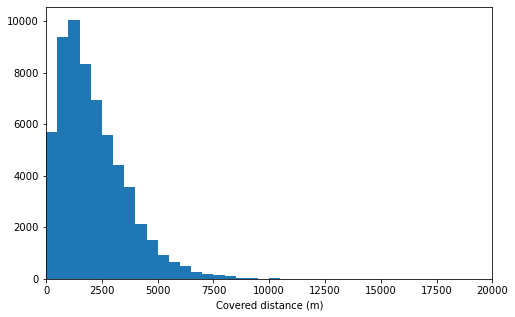

In [29]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, bike['covered_distance'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'covered_distance', bins = bins)
plt.xlabel('Covered distance (m)')
plt.xlim(0, 20000)
plt.ylim();

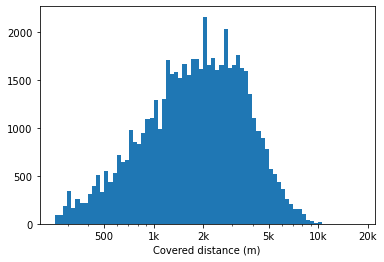

In [30]:
# plotting duration on a standard scale
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike['covered_distance'].max())+log_binsize, log_binsize)
plt.hist(data = bike, x = 'covered_distance', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Covered distance (m)')
plt.ylim();

In [31]:
np.log10(bike.covered_distance.describe())

count    4.781633
mean     3.325717
std      3.176412
min      0.944803
25%      3.000031
50%      3.252669
75%      3.467942
max      4.243176
Name: covered_distance, dtype: float64

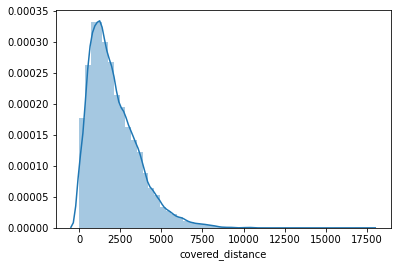

In [32]:
sns.distplot(bike['covered_distance']);

In [33]:
bike.covered_distance.describe()

count    60483.000000
mean      2116.983025
std       1501.107510
min          8.806488
25%       1000.072359
50%       1789.242746
75%       2937.259256
max      17505.542197
Name: covered_distance, dtype: float64

* Covered distance has a long-tailed distribution and its skewed to the right, with few riders covering long distance with a maximum of 17505 metres. The distribution is skewed to the right.

The next predictor feature is the duration

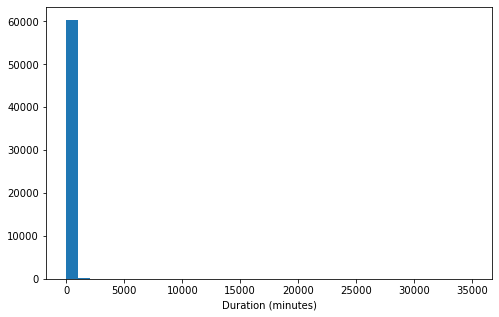

In [34]:
# start with a standard-scaled plot
binsize = 1000
bins = np.arange(0, bike['duration'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration', bins = bins)
plt.xlabel('Duration (minutes)')
plt.xlim()
plt.ylim();

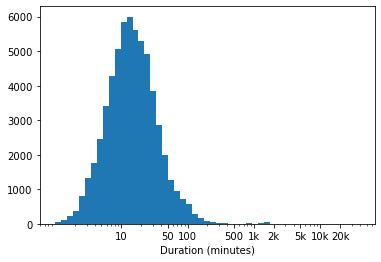

In [35]:
# plotting duration on a standard scale
log_binsize = 0.09
bins = 10 ** np.arange(0, np.log10(bike['duration'].max())+log_binsize, log_binsize)
plt.hist(data = bike, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks([10, 50, 100, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [10, 50, 100, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (minutes)')
plt.ylim();

The duration of the trip consist of a lot of high outliers and the distribution of the graph is unimodal

Let's explore other features for more details

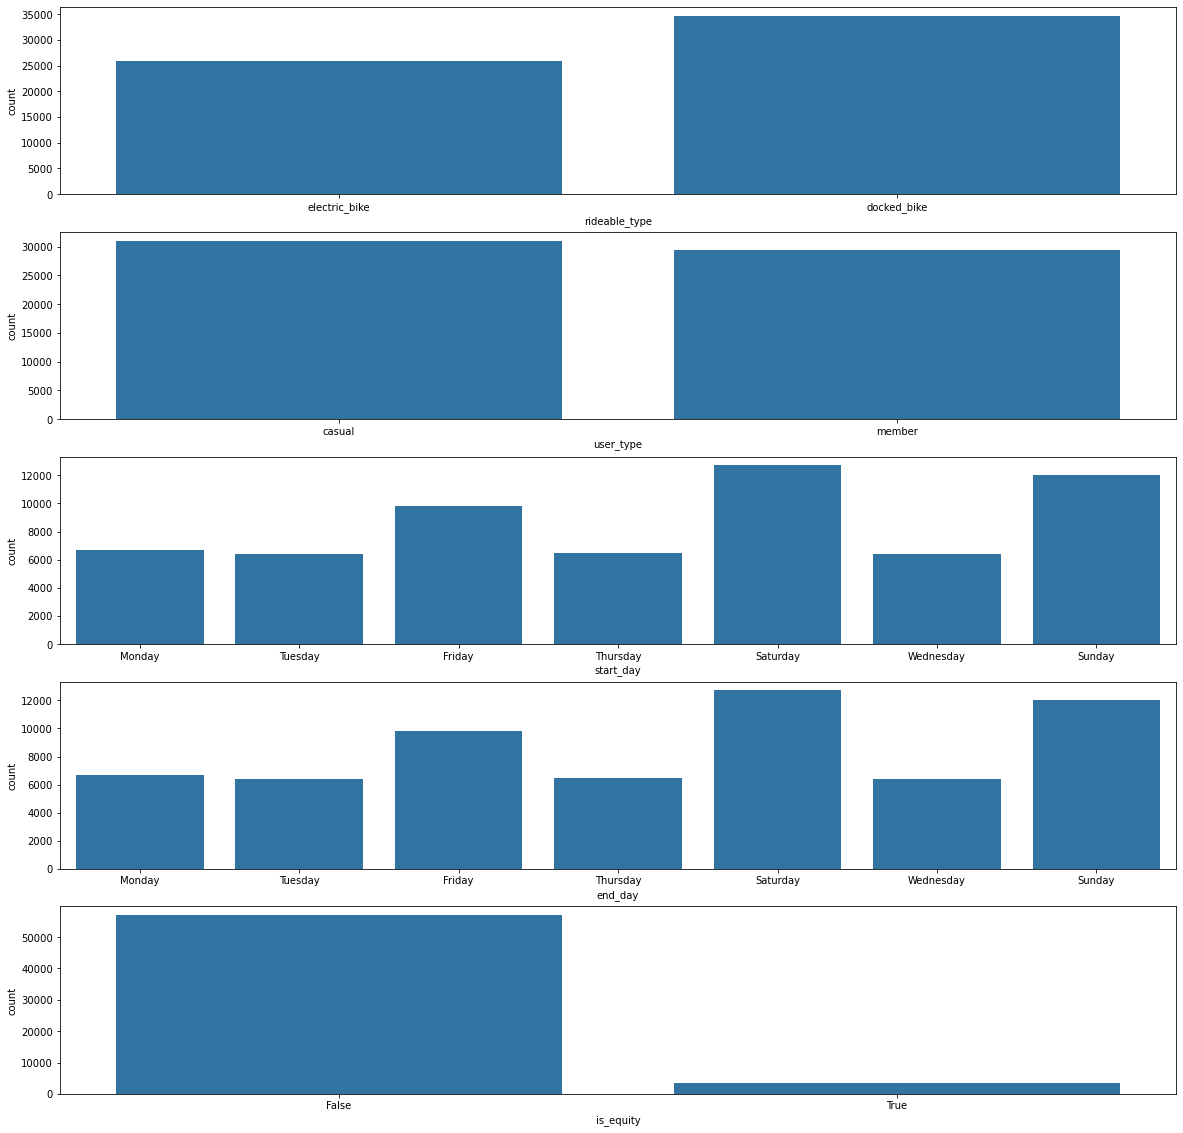

In [36]:
# let's plot all user_type, start_station_name, end_station_name, is_equity, 
#start_day and end_day together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=5, figsize = [20,20])

default_color = sns.color_palette()[0]
sns.countplot(data = bike, x = 'rideable_type', color = default_color, ax = ax[0])
sns.countplot(data = bike, x = 'user_type', color = default_color, ax = ax[1])
sns.countplot(data = bike, x = 'start_day', color = default_color, ax = ax[2])
sns.countplot(data = bike, x = 'end_day', color = default_color, ax = ax[3])
sns.countplot(data = bike, x = 'is_equity', color = default_color, ax = ax[4])
plt.show()

### Checking for outliers

I'm currently at dead end and i couldn't remove high outliers in the covered distance and duration.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> A lot of unusual point was discovered in my exploration, I noticed large distance which occured as a result of incorrect start or end geoloction point and was able to reduce some errors by removing rows where distance covered equals or less than zero. Also, some unusual point was present in the duration due to error in the start and end timestamp and i was able to reduce it by removing some rows with a duration less or equal to zero. I performed some transformation in the plot so that my graph can be self explanatory

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  I noticed large distance which occured as a result of incorrect start or end geoloction point and was able to reduce some errors by removing rows where distance covered equals or less than zero. Also, some unusual point was present in the duration due to error in the start and end timestamp and i was able to reduce it by removing some rows with a duration less or equal to zero. I did this so that i can reduce the outliers present in the dependent feature. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [37]:
bike.sample(3)

ride_id rideable_type             start_station_name  \
47395  DC483CA1B3A8F5FC   docked_bike  The Embarcadero at Sansome St   
58174  CC3A9CB9890592B1   docked_bike            Folsom St at 9th St   
86685  3346CC7087A12A27   docked_bike           8th St at Ringold St   

       start_station_id                                   end_station_name  \
47395               6.0  San Francisco Ferry Building (Harry Bridges Pl...   
58174              78.0                               Myrtle St at Polk St   
86685              60.0                               8th St at Brannan St   

       end_station_id user_type  is_equity  covered_distance   duration  \
47395            15.0    casual      False       1310.270021   6.300000   
58174           368.0    member      False       1477.522137  13.116667   
86685           350.0    member      False        467.957765   2.966667   

      start_day end_day  
47395    Monday  Monday  
58174    Friday  Friday  
86685    Sunday  Sunday

In [38]:
numeric_vars = ['covered_distance', 'duration', 'start_station_id', 'end_station_id']
categoric_vars = ['user_type', 'rideable_type','start_day','end_day', 'is_equity']

### Heat Map
> Plotting the heat map for the quantitative variables comes next for more insight into the correlation between the variables.

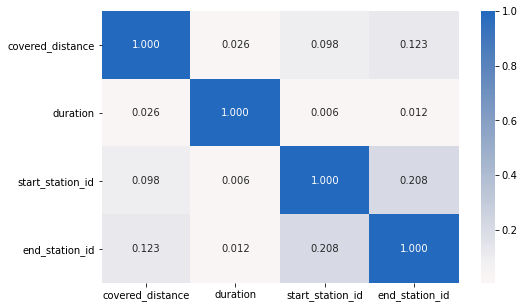

In [39]:
plt.figure(figsize = [8, 5])
sns.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

<Figure size 720x720 with 0 Axes>

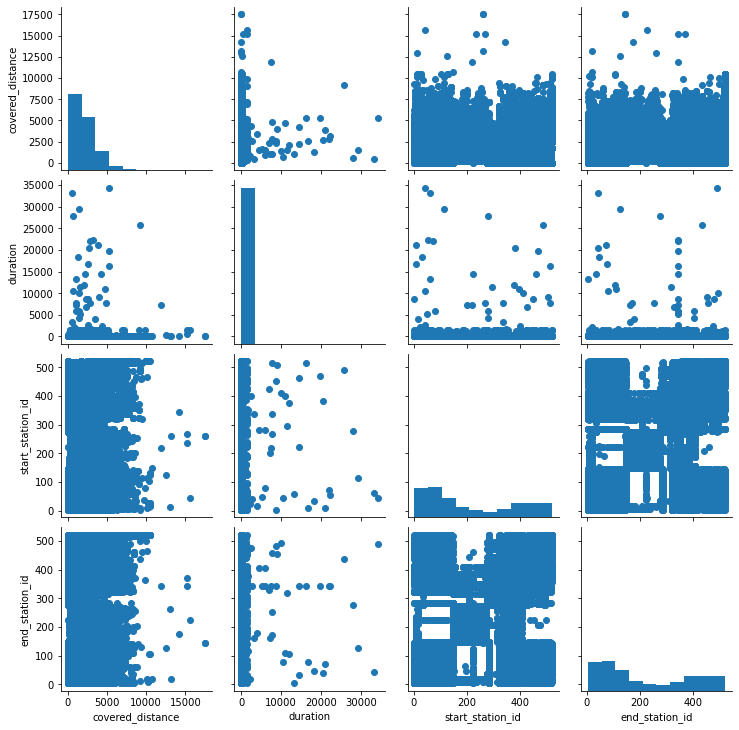

In [40]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
plt.figure(figsize = [10, 10]);
g = sns.PairGrid(data = bike, vars = ['covered_distance', 'duration', 'start_station_id', 'end_station_id'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);


#### Relationship between quantitative variables
Checking the relation between duration and covered distance

<Figure size 720x720 with 0 Axes>

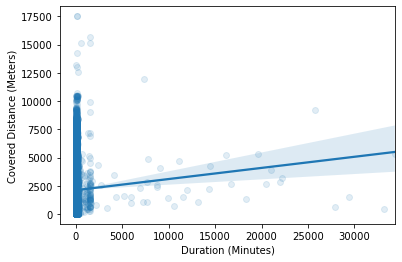

<Figure size 720x720 with 0 Axes>

In [41]:
# Using a regression plot
sns.regplot(data = bike, x='duration', y='covered_distance', x_jitter=0.04, scatter_kws={'alpha' : 1/8})
plt.xlabel('Duration (Minutes)')
plt.ylabel('Covered Distance (Meters)');
plt.figure(figsize = [10, 10])

>* The about regplot show the relationship between the duration and covered distance, and there is a positve 
correlation between them.

#### Relationship between quantitative variable and qualitative variables 
* Checking the relation between duration and covered distance

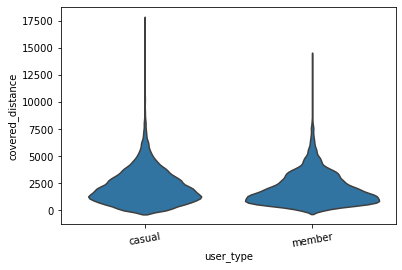

In [42]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='covered_distance', x='user_type', color=base_color, inner=None);
plt.xticks(rotation =10);


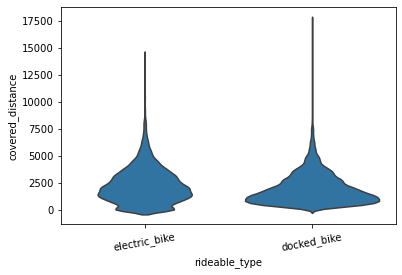

In [43]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='covered_distance', x='rideable_type', color=base_color, inner=None);
plt.xticks(rotation =10);

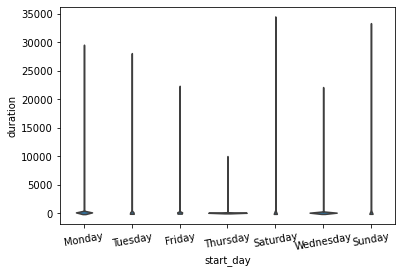

In [44]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='duration', x='start_day', color=base_color, inner=None);
plt.xticks(rotation =10);


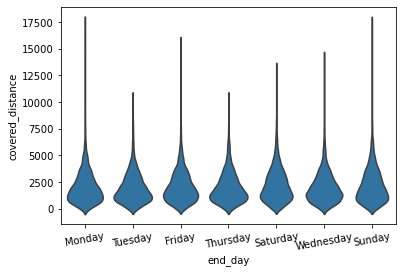

In [45]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='covered_distance', x='end_day', color=base_color, inner=None);
plt.xticks(rotation =10);


#### How duration and covered_distance corelate with the categorical variables

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


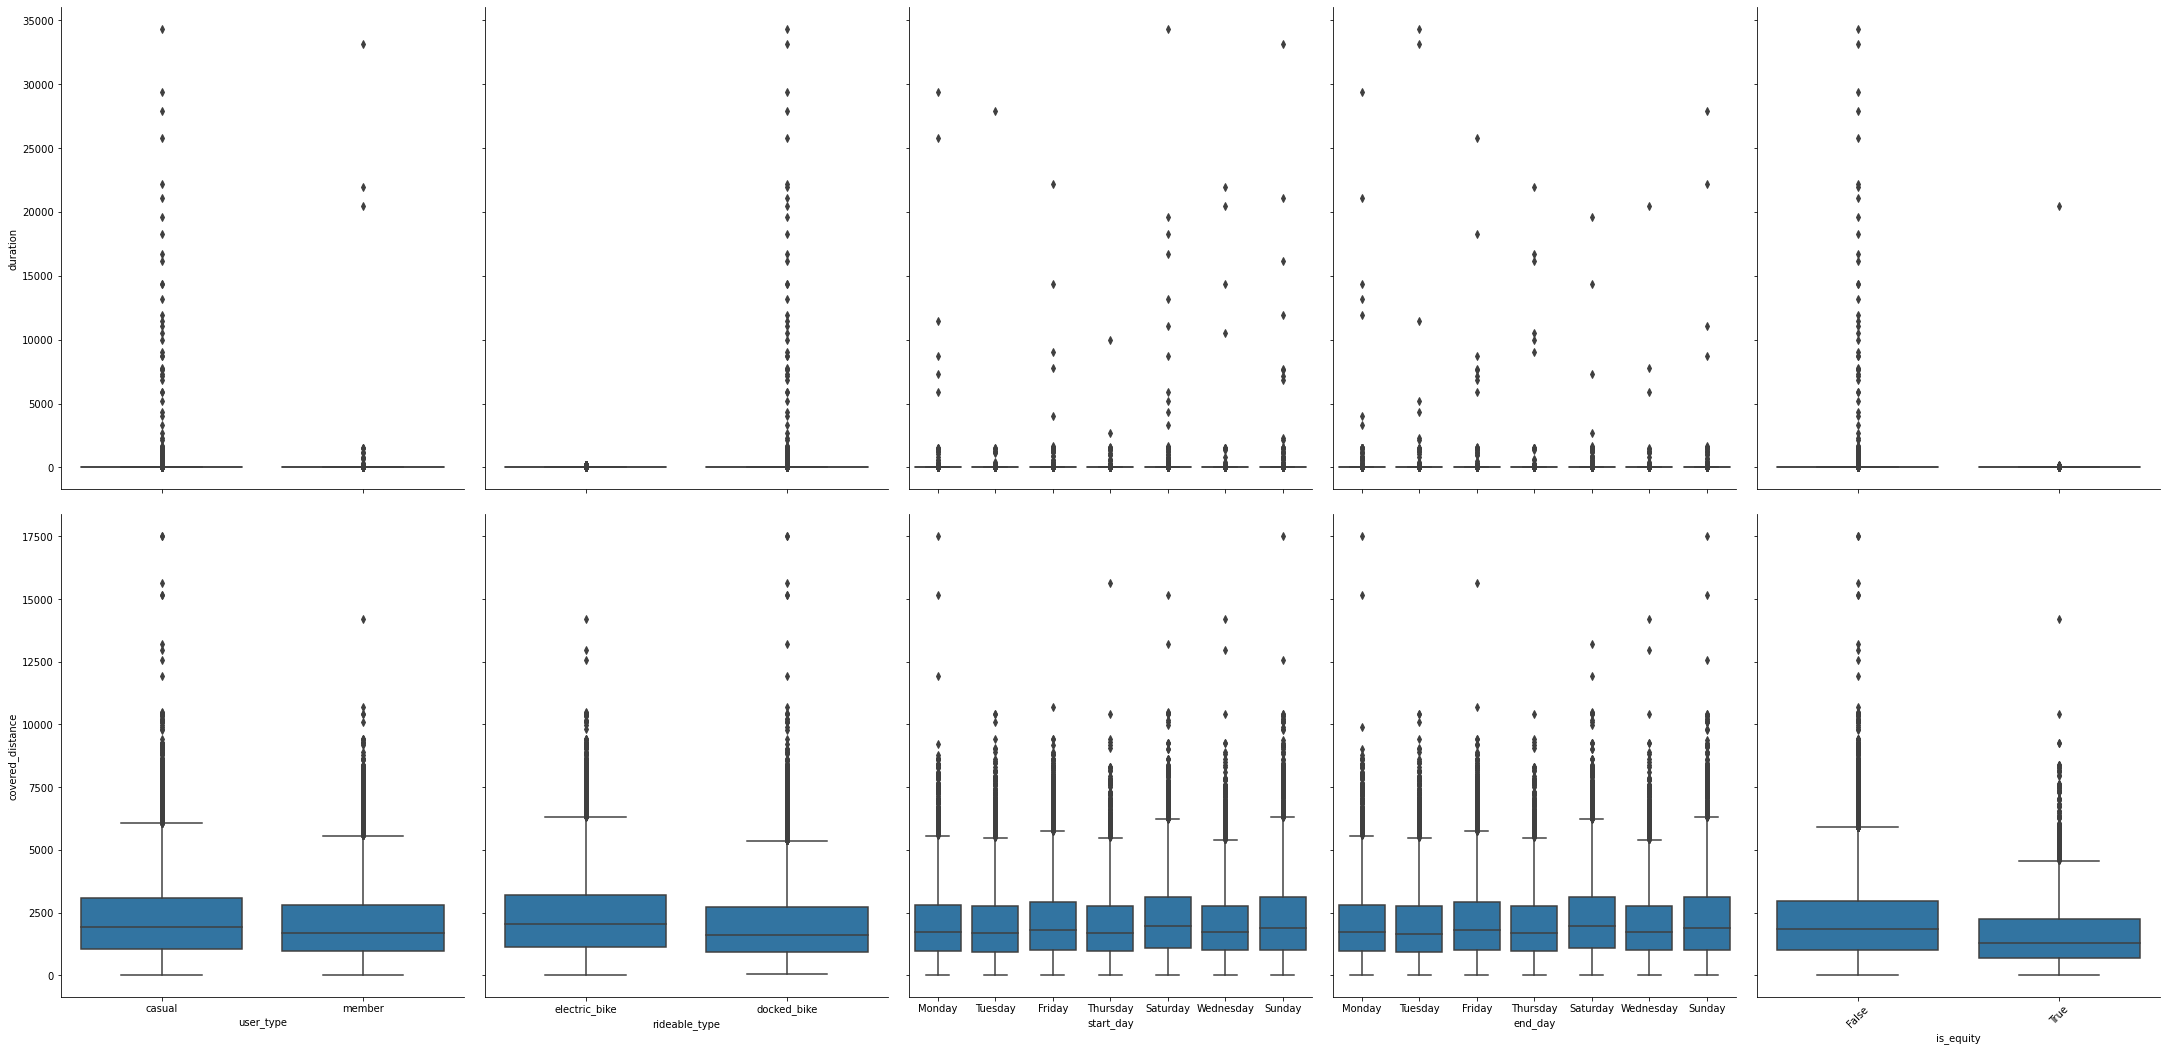

In [46]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)


g = sns.PairGrid(data = bike, y_vars = ['duration', 'covered_distance'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.fig.set_size_inches(30,15)
g.map(boxgrid)
plt.xticks(rotation =45);
plt.show();

#### Relationship between the 5 categorical features

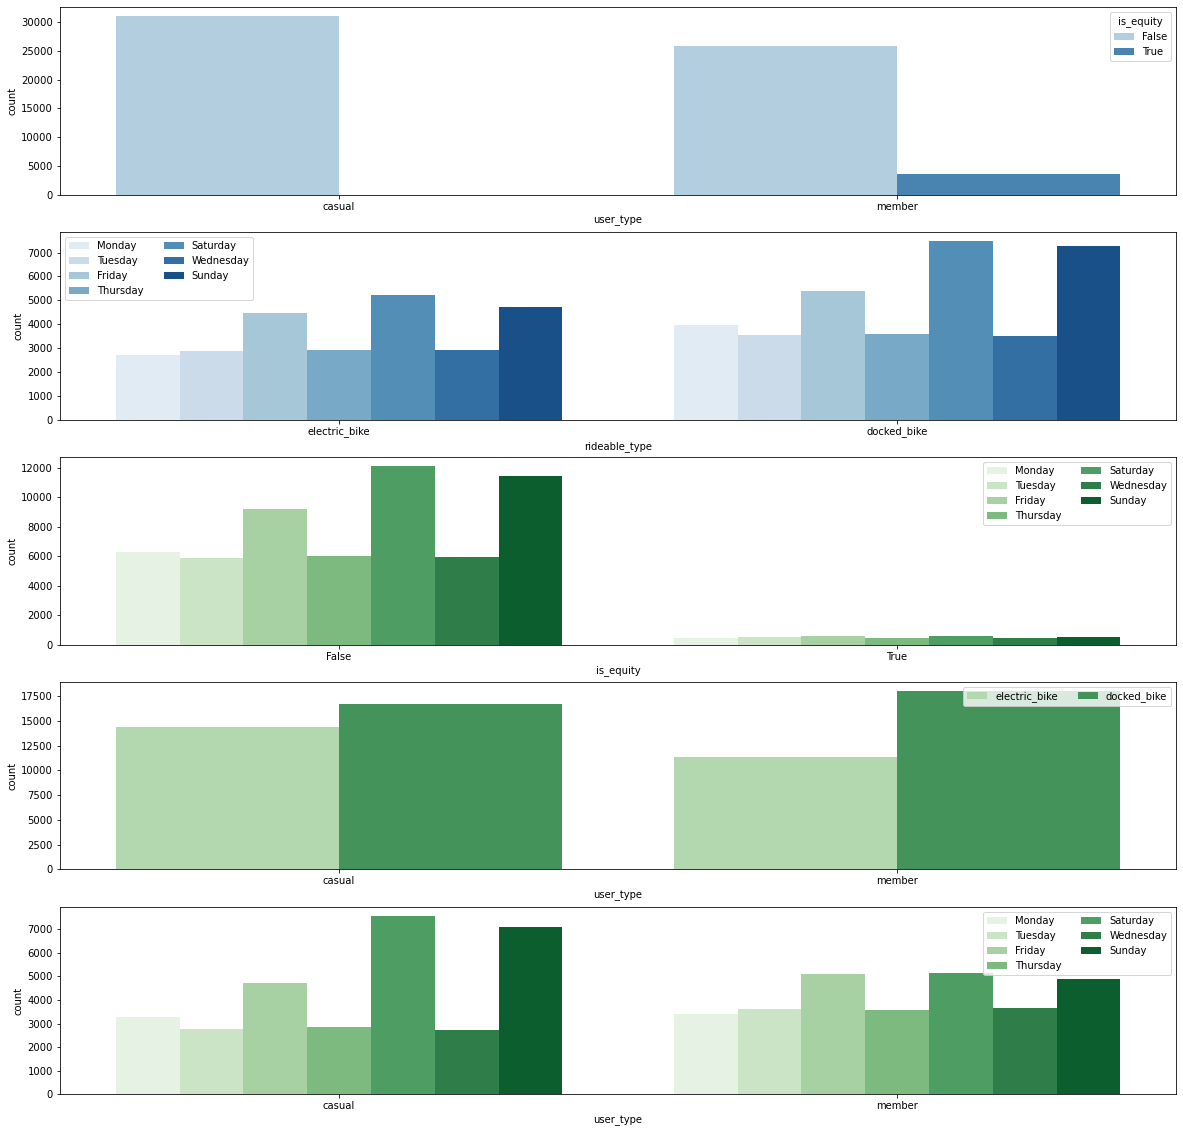

In [47]:
plt.figure(figsize = [20, 20])

# subplot 1: UserType vs IsEquity
plt.subplot(5, 1, 1)
sns.countplot(data = bike, x = 'user_type', hue = 'is_equity', palette = 'Blues')

# subplot 2: Rideable vs. Startday
ax = plt.subplot(5, 1, 2)
sns.countplot(data = bike, x = 'rideable_type', hue = 'start_day', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: IsEquity vs. EndDay, use different color palette
ax = plt.subplot(5, 1, 3)
sns.countplot(data = bike, x = 'is_equity', hue = 'end_day', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
# subplot 4: UserType vs. RideableType, use different color palette
ax = plt.subplot(5, 1, 4)
sns.countplot(data = bike, x = 'user_type', hue = 'rideable_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
# subplot 5: UserType vs. EndDay, use different color palette
ax = plt.subplot(5, 1, 5)
sns.countplot(data = bike, x = 'user_type', hue = 'end_day', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping



plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Quantitative relationship
> Correlation with duration.
The distance covered is a little bit correlated to the duration, while  the start_station_id and end_station_id is not correlated to the duration.
> Correlation with covered distance.
The duration is a little bit correlated to the distance, while  the start_station_id and end_station_id is not correlated to the distance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes there is relationship among other features such has covered_distance and user_type.

## Research Questions

> 1. What day of the week has the highest number of riders.
> 2. What categories of rider has fair judgement.

#### 1. What day of the week has the highest number of riders.

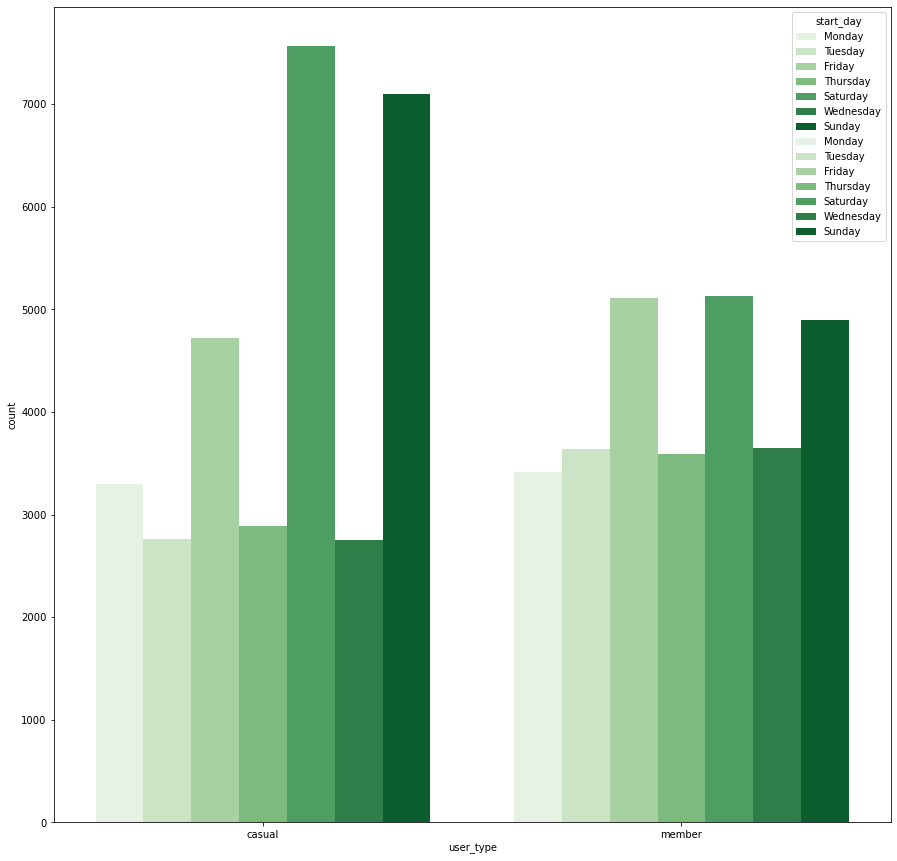

In [48]:
# Countplot for usertype and end_day
plt.figure(figsize = [15, 15])
sns.countplot(data = bike, x = 'user_type', hue = 'end_day', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

sns.countplot(data = bike, x = 'user_type', hue = 'start_day', palette ='Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

> * Saturdays and the membership type is casual.

#### 2. What categories of rider has fair judgement.

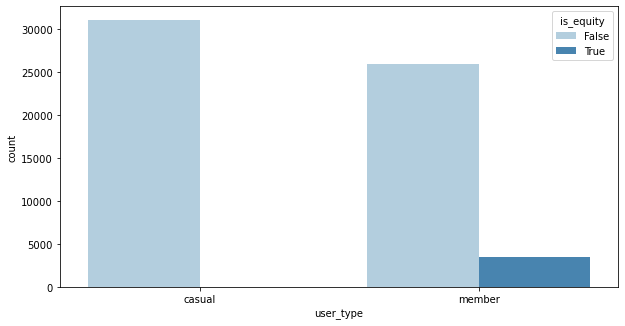

In [49]:
# subplot 1: UserType vs IsEquity
plt.figure(figsize = [10, 30])
plt.subplot(5, 1, 1)
sns.countplot(data = bike, x = 'user_type', hue = 'is_equity', palette = 'Blues');

> * The member categories has the highest record of fair judgement in`the Ford GoBike Trip

### Conclusion
>* The day with the highest number of riders is saturday from both user type.
> * The most prevalent user type with fair judgement is the users that are the real member and not casual member